In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import scipy as sp
import nltk
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [220]:

df = pd.read_csv('Hallucination-Dataset-400-Samples.csv')

print(df.head())

                                             Context  \
0  The revolutionary CoolMOS™ power MOSFET family...   
1  Magnetic switches and magnetic latches operate...   
2  Serial Flash Discoverable Parameters (SFDP) is...   
3  EiceDRIVERTM 2EDN family is known for fast, pr...   
4  The ICL88xx family of single-stage flyback con...   

                                            Question  \
0  What is the purpose of Infineon’s Engine Manag...   
1         What scenario did the algorithms generate?   
2  What is the standard number for Serial Flash D...   
3  What makes the 2EDN family a new reference in ...   
4  How many I/O lanes does Dual Quad I/O SPI supp...   

                                              Answer  Hallucination  \
0  Minimizing layout resistance and maximizing co...              1   
1  There are no different types of magnetic senso...              1   
2           The standard number for SFDP is JESD2163              0   
3  The 2EDN family features 4 V and 8 V UV

In [221]:
df.head()

,Context,Question,Answer,Hallucination,Prediction
0,The revolutionary CoolMOS™ power MOSFET family...,What is the purpose of Infineon’s Engine Manag...,Minimizing layout resistance and maximizing co...,1,NaN
1,Magnetic switches and magnetic latches operate...,What scenario did the algorithms generate?,There are no different types of magnetic senso...,1,NaN
2,Serial Flash Discoverable Parameters (SFDP) is...,What is the standard number for Serial Flash D...,The standard number for SFDP is JESD2163,0,NaN
3,"EiceDRIVERTM 2EDN family is known for fast, pr...",What makes the 2EDN family a new reference in ...,The 2EDN family features 4 V and 8 V UVLO for ...,0,NaN
4,The ICL88xx family of single-stage flyback con...,How many I/O lanes does Dual Quad I/O SPI supp...,Energy harvesting,1,NaN


In [222]:
df.tail()

,Context,Question,Answer,Hallucination,Prediction
397,While exploring AI-driven applications in semi...,What are the benefits of a consistent pinout s...,The AI system projected a scenario where semic...,1,NaN
398,The 2ED132x family consists of four 1200-V SOI...,"What does the 2ED132x family offer, and what a...",Four 1200-V SOI gate drivers with 2.3 A output...,0,NaN
399,our complete solutions include all the buildin...,How does your solution contribute to faster ma...,Our solution accelerates market entry by provi...,0,NaN
400,6EDL7141 is Infineon’s latest 3-phase motor c...,What are the ideal applications for the 6EDL71...,Suitable for underwater applications.,1,NaN
401,"SDARS, broadcasting in the S-band from 2320 – ...",What is the frequency range of SDARS satellite...,2300 – 2350 MHz,1,NaN


In [223]:
df.describe()

,Hallucination,Prediction
count,402.000000,0.0
mean,0.601990,NaN
std,0.490097,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


In [224]:
df.corr()

<ipython-input-224-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Hallucination,Prediction
Hallucination,1.0,NaN
Prediction,NaN,NaN


array([[<Axes: title={'center': 'Hallucination'}>,
        <Axes: title={'center': 'Prediction'}>]], dtype=object)

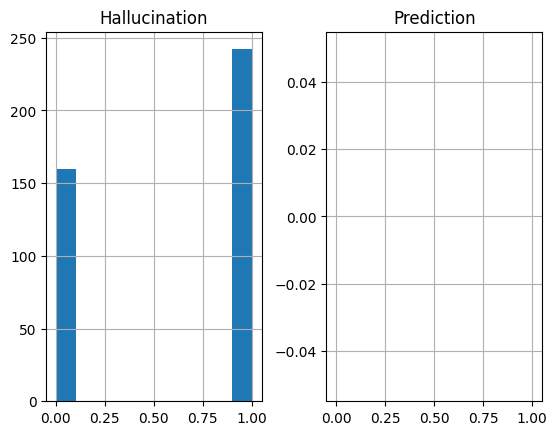

In [225]:
df.hist()

<Axes: >

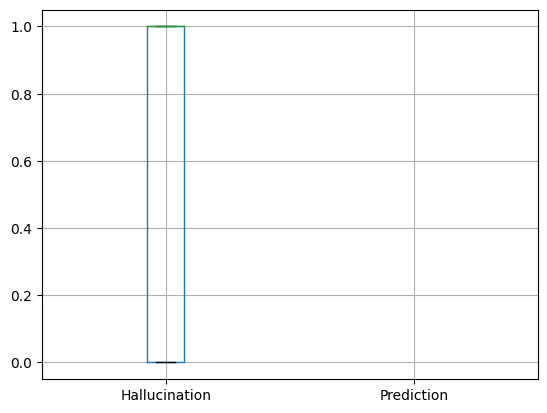

In [226]:
df.boxplot()

In [227]:
df.columns

Index(['Context', 'Question', 'Answer', 'Hallucination', 'Prediction'], dtype='object')

In [228]:
df_grouped = df.groupby(['Context','Question','Hallucination', 'Prediction'])

In [229]:
df

,Context,Question,Answer,Hallucination,Prediction
0,The revolutionary CoolMOS™ power MOSFET family...,What is the purpose of Infineon’s Engine Manag...,Minimizing layout resistance and maximizing co...,1,NaN
1,Magnetic switches and magnetic latches operate...,What scenario did the algorithms generate?,There are no different types of magnetic senso...,1,NaN
2,Serial Flash Discoverable Parameters (SFDP) is...,What is the standard number for Serial Flash D...,The standard number for SFDP is JESD2163,0,NaN
3,"EiceDRIVERTM 2EDN family is known for fast, pr...",What makes the 2EDN family a new reference in ...,The 2EDN family features 4 V and 8 V UVLO for ...,0,NaN
4,The ICL88xx family of single-stage flyback con...,How many I/O lanes does Dual Quad I/O SPI supp...,Energy harvesting,1,NaN
...,...,...,...,...,...
397,While exploring AI-driven applications in semi...,What are the benefits of a consistent pinout s...,The AI system projected a scenario where semic...,1,NaN
398,The 2ED132x family consists of four 1200-V SOI...,"What does the 2ED132x family offer, and what a...",Four 1200-V SOI gate drivers with 2.3 A output...,0,NaN
399,our complete solutions include all the buildin...,How does your solution contribute to faster ma...,Our solution accelerates market entry by provi...,0,NaN
400,6EDL7141 is Infineon’s latest 3-phase motor c...,What are the ideal applications for the 6EDL71...,Suitable for underwater applications.,1,NaN


In [230]:

df = pd.read_csv('Hallucination-Dataset-400-Samples.csv')

df['Context'] = df['Context'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
df['Question'] = df['Question'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
df['Answer'] = df['Answer'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
df.fillna('', inplace=True)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Context'] + ' ' + df['Question'] + ' ' + df['Answer'])


<ipython-input-230-26f6ec17a3ce>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Context'] = df['Context'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
<ipython-input-230-26f6ec17a3ce>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Question'] = df['Question'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()
<ipython-input-230-26f6ec17a3ce>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Answer'] = df['Answer'].str.replace('[^a-zA-Z0-9 ]', '').str.lower()


In [231]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Context'] + ' ' + df['Question'] + ' ' + df['Answer'])

In [232]:
print("Shape of transformed data:", X.shape)

Shape of transformed data: (402, 3051)


In [233]:
dump(X, 'transformed_data.joblib')

['transformed_data.joblib']

In [234]:
from joblib import load
X_transformed = load('transformed_data.joblib')

In [235]:
text_data = df['Context'] + ' ' + df['Question'] + ' ' + df['Answer']

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names_out()
df.fillna('', inplace=True)

print(feature_names[:10])

['008' '009' '01005' '015' '01h' '02' '0201' '023' '028' '02h']


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Context        402 non-null    object
 1   Question       402 non-null    object
 2   Answer         402 non-null    object
 3   Hallucination  402 non-null    int64 
 4   Prediction     402 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [237]:
cv = CountVectorizer()

X = cv.fit_transform(df['Answer']).toarray()

features = cv.get_feature_names_out()

df_bow = pd.DataFrame(X, columns=features)


In [238]:

X_train, X_test, y_train, y_test = train_test_split(df['Answer'], df['Hallucination'], test_size=0.5, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [239]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['Answer'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['008' '009' '015' ... 'your' 'zero' 'zerodefects']


In [240]:
tokenized_context = df['Context'].apply(word_tokenize)

print(tokenized_context)

0      [the, revolutionary, coolmos, power, mosfet, f...
1      [magnetic, switches, and, magnetic, latches, o...
2      [serial, flash, discoverable, parameters, sfdp...
3      [eicedrivertm, 2edn, family, is, known, for, f...
4      [the, icl88xx, family, of, singlestage, flybac...
                             ...                        
397    [while, exploring, aidriven, applications, in,...
398    [the, 2ed132x, family, consists, of, four, 120...
399    [our, complete, solutions, include, all, the, ...
400    [6edl7141, is, infineons, latest, 3phase, moto...
401    [sdars, broadcasting, in, the, sband, from, 23...
Name: Context, Length: 402, dtype: object


In [241]:
tokenized_context = df['Context'].apply(word_tokenize)

stemmer = PorterStemmer()

stemmed_context = tokenized_context.apply(lambda x: [stemmer.stem(word) for word in x])

print(stemmed_context)

0      [the, revolutionari, coolmo, power, mosfet, fa...
1      [magnet, switch, and, magnet, latch, oper, upo...
2      [serial, flash, discover, paramet, sfdp, is, a...
3      [eicedrivertm, 2edn, famili, is, known, for, f...
4      [the, icl88xx, famili, of, singlestag, flyback...
                             ...                        
397    [while, explor, aidriven, applic, in, semicond...
398    [the, 2ed132x, famili, consist, of, four, 1200...
399    [our, complet, solut, includ, all, the, build,...
400    [6edl7141, is, infineon, latest, 3phase, motor...
401    [sdar, broadcast, in, the, sband, from, 2320, ...
Name: Context, Length: 402, dtype: object


In [242]:
lemmatizer = WordNetLemmatizer()

In [243]:
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [244]:

df.to_csv("Hallucination-Dataset-400-Samples.txt", sep='\t', index=False)

with open("Hallucination-Dataset-400-Samples.txt", "rb") as f:
    data = f.read()

print(data)

b'Context\tQuestion\tAnswer\tHallucination\tPrediction\nthe revolutionary coolmos power mosfet family sets new standards in the field of energy efficiency\twhat is the purpose of infineons engine management ics\tminimizing layout resistance and maximizing commutation behavior\t1\t\nmagnetic switches and magnetic latches operate upon the hall effect principle to detect the presence of a magnetic field minimal energy consumption and considerable temperature operation ranges make them ideally suited for crossindustry proximity detection within a range of environments the tle496x family of magnetic sensors is designed for automotive application and conforms to rigorous aecq100 standards applications include bldc commutation window lifting power closing and safety features such as seat belt detection tli496x magnetic sensors are built to industrial standards and are equally effective in bldc commutation as well as index counting and general openclose detection finally tlv96x sensors furnish

In [245]:
df = df.replace(np.nan, '', regex=True)

X = df['Question'] + df['Answer']
y = df['Hallucination']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [246]:

X = df['Question'] + df['Answer']
y = df['Hallucination']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {acc:.2f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Accuracy for Logistic Regression: 0.86
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.87      0.92      0.90        51

    accuracy                           0.86        81
   macro avg       0.86      0.84      0.85        81
weighted avg       0.86      0.86      0.86        81

Accuracy for SVM: 0.83
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        30
           1       0.79      0.98      0.88        51

    accuracy                           0.83        81
   macro avg       0.87      0.77      0.79        81
weighted avg       0.85      0.83      0.81        81

Accuracy for Naive Bayes: 0.85
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.85    